In [598]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Acess full data

In [599]:
covid19_fulldata_url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df_full = pd.read_csv(covid19_fulldata_url)

In [600]:
starting_base = 100

In [601]:
df_ca = df_full[(df_full.location == 'Canada') & 
                (df_full.total_cases >= starting_base)]
df_ca.reset_index(inplace=True, drop=True)
df_ca.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-03-12,Canada,10,0,103,1
1,2020-03-13,Canada,35,0,138,1
2,2020-03-14,Canada,38,0,176,1
3,2020-03-15,Canada,68,0,244,1
4,2020-03-16,Canada,60,0,304,1


In [602]:
df_us = df_full.loc[(df_full.location == 'United States') & 
                    (df_full.total_cases >= starting_base)]
df_us.reset_index(inplace=True, drop=True)
df_us.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-03-03,United States,14,4,103,6
1,2020-03-04,United States,22,3,125,9
2,2020-03-05,United States,34,2,159,11
3,2020-03-06,United States,74,1,233,12
4,2020-03-07,United States,105,2,338,14


In [603]:
df_it = df_full.loc[(df_full.location == 'Italy') & 
                    (df_full.total_cases >= starting_base)]
df_it.reset_index(inplace=True, drop=True)
df_it.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-24,Italy,53,0,132,2
1,2020-02-25,Italy,97,4,229,6
2,2020-02-26,Italy,93,5,322,11
3,2020-02-27,Italy,78,1,400,12
4,2020-02-28,Italy,250,5,650,17


# Plot from all dimensions

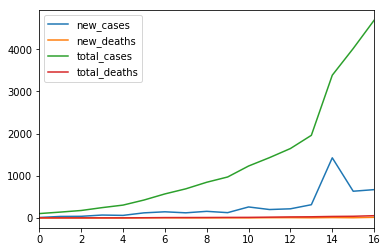

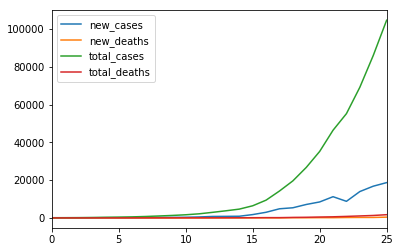

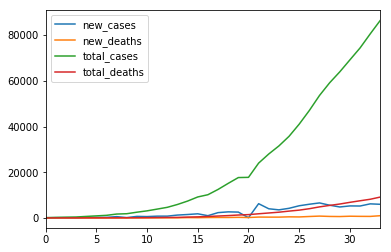

In [604]:
df_ca.plot()
df_us.plot()
df_it.plot()
plt.show()

# Plot New Cases

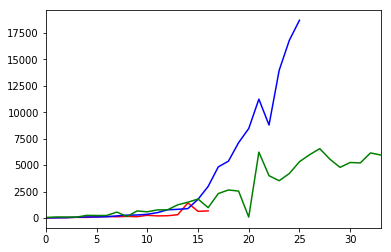

In [605]:
df_ca['new_cases'].plot(color='red')
df_us['new_cases'].plot(color='blue')
df_it['new_cases'].plot(color='green')
plt.show()

# Plot Total Cases

In [606]:
def plot_us_ca_it(): 
    ax_title = 'Italy, US and Canada - Curve Comparison'
    ax_subtitle = 'Based on Cumulative Count of COVID-19 Confirmed Cases'
    xlabel = f'Day(since {starting_base} case)'
    ylabel = 'Total Confirmed Cases'
    figure_size = (12, 4)

    fig, ax = plt.subplots()

    df_ca['total_cases'].plot(kind='bar',
                              color='red',
                              alpha=0.8, label='Canada', ax=ax)
    df_us['total_cases'].plot(kind='bar',
                              color='blue',
                              alpha=0.5, 
                              ax=ax)
    df_it['total_cases'].plot(kind='bar', 
                              color='green', 
                              alpha=0.3, 
                              ax=ax,
                              figsize=figure_size, 
                              label='Italy')

    ax.annotate(f'Canada\n{df_ca.tail(1).total_cases.values[0]}', 
                xy=(df_ca.shape[0]-1, df_ca.tail(1).total_cases),
                xytext=(df_ca.shape[0]-3, df_us.tail(1).total_cases/2),
                horizontalalignment='center',
                color='red', 
                arrowprops=dict(facecolor='red'))
    ax.annotate(f'US\n{df_us.tail(1).total_cases.values[0]}', 
                xy=(df_us.shape[0]-1, df_us.tail(1).total_cases),
                xytext=(df_us.shape[0]-3, df_us.tail(1).total_cases),
                horizontalalignment='center',
                color='blue', 
                arrowprops=dict(facecolor='blue'))
    ax.annotate(f'Italy\n{df_it.tail(1).total_cases.values[0]}', 
                xy=(df_it.shape[0]-1, df_it.tail(1).total_cases),
                xytext=(df_it.shape[0]-3, df_it.tail(1).total_cases),
                horizontalalignment='center',
                color='green',
                arrowprops=dict(facecolor='green'))


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(ax_subtitle, fontsize=10)
    plt.suptitle(ax_title, y=1, fontsize=18)

    plt.show()

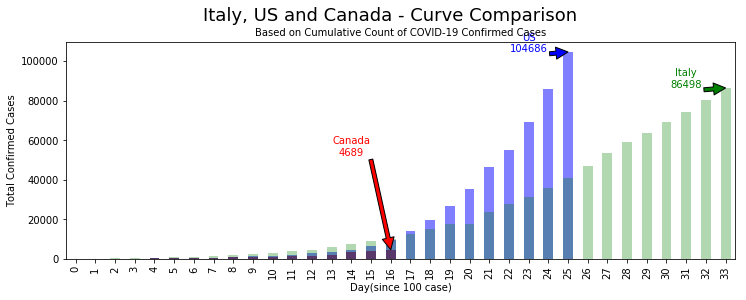

In [607]:
plot_us_ca_it()

In [608]:
population_us = 329.45
population_ca = 37.59
population_it = 60.55

weight_ca_vs_us = int(population_us/population_ca)
weight_it_vs_us = int(population_us/population_it)

df_ca = df_ca.assign(total_cases = df_ca.total_cases.mul(weight_ca_vs_us))
df_it = df_it.assign(total_cases = df_it.total_cases.mul(weight_ca_vs_us))

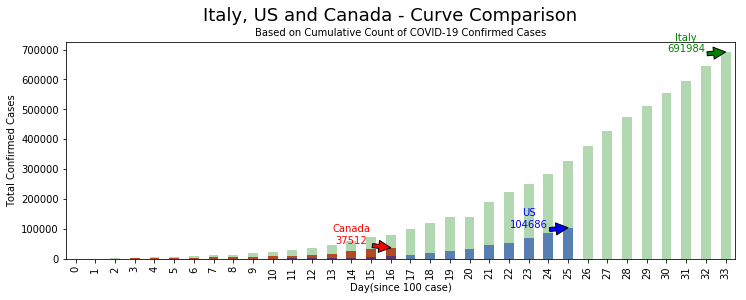

In [609]:
plot_us_ca_it()